<a href="https://colab.research.google.com/github/yoniamit/batlocations/blob/main/batlocations060521.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [122]:
#Imports
import math
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
from sklearn.mixture import GaussianMixture
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from scipy.interpolate import interp1d
from sklearn.linear_model import LinearRegression
import pickle


#Definations
food_visit_aray = [{
20595:	0,
20632:	0,
20522:	0,
20516:	0,
20493:	0,
20616:	0,
20513:	0,
20488:	0,
20528:	0,
20547:	0,
62438:	0,
20592:	0,
20529:	0,
20453:	0 }]

xlb = 320.0  # x left basket
ylb = 410.0  # y left basket
xrb = 420.0  # x right basket
yrb = 60.0  # y right basket
basketradius = 40.0  # distance from the center of the basket which count as "IN"
accuracy_limit = 0.0  # Value for accuracy check 

nans_tresh  = 0.9
per_unit = 10
gmmcomp = 3
#tresh_sleep_distance = 10

#data_read_path = "/content/drive/MyDrive/Python files/20210311-161231IrTimes.txt" #path_of data to read
#data_read_path = "/content/drive/MyDrive/Python files/20210104-170423IrTimes.txt"

data_read_path = []
dict_of_info = []

data_read_path.append("/content/drive/MyDrive/Python files/20210201-202753IrTimes.txt")
dict_of_info.append({1:20493, 2 :20528, 4 :20516, 5 :20488})

data_read_path.append( "/content/drive/MyDrive/Python files/20210207-154302IrTimes.txt")
dict_of_info.append( {0: 20547, 1: 20493, 3: 62438, 4: 20516, 5: 20488})

data_read_path.append( "/content/drive/MyDrive/Python files/20210215-105316IrTimes.txt")
dict_of_info.append({0 :  20547 ,1 :  20493,3 :  62438 ,4 :  20516,5  : 20488})

data_read_path.append("/content/drive/MyDrive/Python files/20210223-205817IrTimes.txt")
dict_of_info.append({3 : 62438 ,4 : 20516,1 : 20528,2 : 20493 ,5 : 20522  ,0:  20547})

data_read_path.append("/content/drive/MyDrive/Python files/20210302-160001IrTimes.txt")
dict_of_info.append({0 :20632,1 :20616,2 :20513,3 :20488,4 :20529,5 :20595 })

data_read_path.append( "/content/drive/MyDrive/Python files/20210311-161231IrTimes.txt")
dict_of_info.append({0:20632, 1:20547, 2:20522, 3:20488, 4:20453, 5:20595})


data_read_path.append( "/content/drive/MyDrive/Python files/20210330-135215IrTimes.txt")
dict_of_info.append({0:20547, 1:20493, 3:62438, 4:20516 , 5:20488, 2: 0})


dict_of_colony = {
20595:	(140,92, "M"),
20632:	(185,94, "M"),
20522:	(160,91, "M"),
20516:	(142,92, "F"),
20493:	(190,94, "M"),
20616:	(180,94, "M"),
20513:	(125,89, "F"),
20488:	(125,91, "M"),
20528:	(110,88, "F"),
20547:	(90,82, "F"),
62438:	(165,87, "F"),
20592:	(140,95, "F"),
20529:	(62,75, "PUP"),
20453:	(170,96, "M") }





dict_food = {
20595:	0,
20632:	0,
20522:	0,
20516:	0,
20493:	0,
20616:	0,
20513:	0,
20488:	0,
20528:	0,
20547:	0,
62438:	0,
20592:	0,
20529:	0,
20453:	0 }

def nan_helper(y):
    return np.isnan(y), lambda z: z.nonzero()[0]



save_path = "/content/drive/MyDrive/Python files/ALL_DATA_BIN10.p"
save_path_dict_food = "/content/drive/MyDrive/Python files/DICT_FOOD_BIN10.p"




In [ ]:
#20201109,164212,b'74,-43,71,-44,71,-44,71,-18,74,-15,71,\r\n',96,284
#20210104,170424,[69, -46, 68, -92, 68, -47, 68, 0, 0, 0, 0],2,[347. 351.],[2. 6.]

path_K_data = "/content/drive/MyDrive/Python files/20201109-164210xydata.txt"
dict_K_data= {
0:  [70, 45, 70, 45, 70, 45],
1:	[70, 45, 70, 45, 70, 90],
2:	[70, 45, 70, 45, 70, 135],
3:	[70, 45, 70, 90, 70, 45],
5:	[70, 45, 70, 90, 70, 135],
8:	[70, 45, 70, 135, 70, 135],
9:	[70, 90, 70, 45, 70, 45],
10:	[70, 90, 70, 45, 70, 90],
11:	[70, 90, 70, 45, 70, 135],
12:	[70, 90, 70, 90, 70, 45],
13:	[70, 90, 70, 90, 70, 90],
14:	[70, 90, 70, 90, 70, 135],
15:	[70, 90, 70, 135, 70, 45],
18:	[70, 135, 70, 45, 70, 45],
19:	[70, 135, 70, 45, 70, 90],
20:	[70, 135, 70, 45, 70, 135] }


def Kelsy_data(mypath):
  f = open(mypath, "r")
  data = f.readlines()
  list_locations = []
  for line in data:
        columns = line.split(",")
        #print(columns[13] + " " + columns[14])

        xydata = [columns[14], columns[15]]
        xydata = [x for x in xydata if x]

        code = np.array([abs(int(columns[3])),abs(int(columns[5])), abs(int(columns[7]))])
        match_code_list = []
        match_code_list_key =[]
        for key in dict_K_data:
          tag_code = np.array([dict_K_data[key][1], dict_K_data[key][3], dict_K_data[key][5]])
          dist = np.linalg.norm(tag_code-code)
          match_code_list.append(dist)
          match_code_list_key.append(key)

        match_code_list = np.array(match_code_list)        
        my_tag = np.argmin(match_code_list)
        my_tag = match_code_list_key[my_tag]

        x = (float(xydata[0].replace("[", "").replace("]", "")))
        y = (float(xydata[1].replace("[", "").replace("]", "")))
        dt = datetime.strptime(columns[0] + " " + columns[1] ,  "%Y%m%d %H%M%S").timestamp()  #20210104
        t = np.array([int(my_tag), dt, x, y])
        list_locations += [t]

  list_array = np.array(list_locations)
  f.close()
  return(list_array)


def day_splitter(list_array):
  dt_list = (list_array[:,1])
  start_time = np.min(list_array[:,1])
  end_time = np.max(list_array[:,1])
  while (start_time < end_time):
    if end_time < (start_time + 24*60*60):
      break
    else:
      temp_list = list_array[(dt_list > start_time) & (dt_list < start_time + 24*60*60), :]]
      

    start time = start_time + 24*60*60




list_array = Kelsy_data(path_K_data)






SyntaxError: ignored

In [4]:
def check_baskets(x,y):
    #if (math.sqrt((x - xlb)**2 + (y - ylb)**2) <= basketradius) or  (math.sqrt((x - xrb)**2 + (y - yrb)**2) <= basketradius):
    if (311.0<x<382.0) and (355.0<y<433.0): 
        return True
    elif (400.0<x<460.0) and (30.0<y<65.0):
        return True
    else:
        return False


In [99]:
def load_raw_file(mypath, session_index):
  f = open(mypath, "r")
  data = Lines = f.readlines()
  list_locations = []
  
  
  for line in data:
      columns = line.split(",")
      #print(columns[13] + " " + columns[14])

      xydata = columns[14].split(" ")
      xydata = [x for x in xydata if x]
      xy_accuracy_data = columns[15].split(" ")  # הוספתי
      xy_accuracy_data = [x for x in xy_accuracy_data if x]  # הוספתי
      if (len(xydata) != 2) or (len(xy_accuracy_data) != 2):  # הוספתי
          continue

      x_accuracy_data = (float(xy_accuracy_data[0].replace("[", "").replace("]", "")))  # הוספתי
      y_accuracy_data = (float(xy_accuracy_data[1].replace("[", "").replace("]", "")))  # הוספתי
      if (y_accuracy_data > accuracy_limit) or (x_accuracy_data > accuracy_limit):  # הוספתי
          continue

      x = (float(xydata[0].replace("[", "").replace("]", "")))
      y = (float(xydata[1].replace("[", "").replace("]", "")))
      dt = datetime.strptime(columns[0] + " " + columns[1] ,  "%Y%m%d %H%M%S").timestamp()  #20210104
      t = np.array([int(columns[13]), dt, x, y])
      list_locations += [t]

      if check_baskets(x,y):
        if int(columns[13]) not in dict_of_info[session_index]:
          continue
        dict_food[dict_of_info[session_index][int(columns[13])]] += 1
        food_visit_aray[session_index][dict_of_info[session_index][int(columns[13])]] += 1

  list_array = np.array(list_locations)

  f.close()

  print("Done! func1!")

  return list_array





In [97]:
def time_arrange_data(list_array):
  t = 0
  minimum_time = np.min(list_array[:,1])
  maximum_time = np.max(list_array[:,1])
  time_now = minimum_time
  list_tag = np.unique(list_array[:,0])
  main_data = np.zeros((len(list_tag),int((maximum_time-minimum_time)/per_unit), 2))




  print(list_array[:,1])
  print(minimum_time, maximum_time)
  print(type(list_tag[0]))

  tagids  = list_array[:,0]
  dates = list_array[:,1]


  while time_now <= (maximum_time - per_unit):
    for a in range(len(list_tag)):
      main_data[a,t,:] = np.mean(list_array[(tagids == list_tag[a]) & (dates> time_now) & (dates< (time_now + per_unit)) ,2:4],axis = 0)
    t += 1  
    time_now += per_unit

  tag_nans = np.zeros((len(list_tag)))
  for a in range(len(list_tag)):
    tag_nans[a] = len(main_data[a,np.isnan(main_data[a,:,0]),0])/len(main_data[a,:,0]) > nans_tresh 

  main_data = main_data[~tag_nans.astype(bool)]
  list_tag = list_tag[~tag_nans.astype(bool)]


  print("Done! func2!")
  #אינטרפולציות
  #for a in range(len(list_tag)):
    #y = main_data[a,:,:]
    #nans, x= nan_helper(y)
    #y[nans]= np.interp(x(nans), x(~nans), y[~nans])
    #main_data[a,:,:] = y
  

  return main_data, list_tag, minimum_time, maximum_time

In [112]:


  #plt.figure()
  #plt.plot(distance_array_in_zero)
  #plt.show()
  #print(distance_array)

In [ ]:
#המרחק שאני זזתי בקורלציה למרחק של שאר הקבוצה ממני
def movment_array_creat(main_data, list_tag, minimum_time, maximum_time):
  time_now = minimum_time + per_unit
  t = 1
  movment_array = np.zeros((len(list_tag),int((maximum_time-minimum_time)/per_unit)))

  while time_now <= (maximum_time - per_unit):
    for a in range(len(list_tag)):
      my_pos = main_data[a,t,:]
      my_prev_pos = main_data[a,t -1,:]
      thedistance = np.linalg.norm(my_pos - my_prev_pos)
      movment_array[a,t-1] = (thedistance )
    t += 1  
    time_now += per_unit

  return movment_array
  
def correlations_generator(movment_array, distance_array, distance_array_in_zero):  
  correlations = []
  for a in range(len(list_tag)):
    correlations.append(np.correlate(movment_array[a,~distance_array_in_zero],distance_array[a,~distance_array_in_zero]))

  correlations = np.array(correlations)
  print(correlations)
  print(list_tag)
  correlations = correlations-np.min(correlations)
  correlations= correlations/np.max(correlations)
  print(correlations)
  return correlations#

In [ ]:
def GMM_compute(main_data, list_tag, minimum_time, maximum_time):
  maindatashape = np.shape(main_data)
  f = np.reshape([main_data[:,:,:] ] , (maindatashape[0]*maindatashape[1] , 2) )
  gm = GaussianMixture(n_components=gmmcomp, random_state=0).fit( f )
  print(gm.means_)
  print(gm.weights_)

 # fig , axs= plt.subplots(len(list_tag) ,figsize=(20,20), sharey=True)
  for a in range(len(list_tag)):
      gmpred = gm.predict(main_data[a,:,:])
      
     # axs[a].set_title("dominance is : " + str(correlations[a]))
      #axs[a].hist(gmpred , bins = range(gmmcomp+1))
      #fig.savefig('result1.png')
  return gm

In [ ]:
def get_correlations_places(main_data, list_tag, minimum_time, maximum_time,gm):
  all_cor_for_pos_list = []
  for p in range(gmmcomp):
    cor_for_pos_list = []
    for a in range(len(list_tag)):
        gmpred = (gm.predict(main_data[a,:,:])   ).astype(int)
        #plt.plot(gmpred )
        cor_for_pos_list.append((correlations[a] , len(gmpred[gmpred==p])))
    cor_for_pos_list = np.array(cor_for_pos_list)
    gmmcount = cor_for_pos_list[:,1]
    gmmcount = gmmcount - np.min(gmmcount)
    gmmcount = gmmcount/np.max(gmmcount)
    cor_for_pos_list[:,1] = gmmcount
    all_cor_for_pos_list.append(cor_for_pos_list)
  return np.array(all_cor_for_pos_list) 
  #fig.savefig('dominanceVsHome0.png')

In [105]:
all_path_data =[]
session_index = 0
for p in data_read_path:
  main_data, list_tag, minimum_time, maximum_time = time_arrange_data(load_raw_file(p, session_index))
  #distance_array, distance_array_in_zero = compute_distance_array(main_data, list_tag, minimum_time, maximum_time)
  #movment_array = movment_array_creat(main_data, list_tag, minimum_time, maximum_time)
  #correlations = correlations_generator(movment_array, distance_array, distance_array_in_zero)
  #gm = GMM_compute(main_data, list_tag, minimum_time, maximum_time)
  #all_cor_for_pos_list = get_correlations_places(main_data, list_tag, minimum_time, maximum_time,gm)
  all_path_data.append((None, None, list_tag, None, main_data, minimum_time, maximum_time))
  session_index += 1
  food_visit_aray += [{
20595:	0,
20632:	0,
20522:	0,
20516:	0,
20493:	0,
20616:	0,
20513:	0,
20488:	0,
20528:	0,
20547:	0,
62438:	0,
20592:	0,
20529:	0,
20453:	0 }]
  print(list_tag)
  print("Done! Part1!")

Done! func1!
[1.61221128e+09 1.61221128e+09 1.61221128e+09 ... 1.61231476e+09
 1.61231476e+09 1.61231476e+09]
1612211276.0 1612314761.0
<class 'numpy.float64'>
Done! func2!
[1. 2. 4. 5.]
Done! Part1!
Done! func1!
[1.61271258e+09 1.61271259e+09 1.61271260e+09 ... 1.61301981e+09
 1.61301981e+09 1.61301981e+09]
1612712585.0 1613019814.0
<class 'numpy.float64'>


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


Done! func2!
[0. 1. 3. 4. 5.]
Done! Part1!
Done! func1!
[1.61338640e+09 1.61338640e+09 1.61338640e+09 ... 1.61372624e+09
 1.61372625e+09 1.61372625e+09]
1613386397.0 1613726250.0
<class 'numpy.float64'>
Done! func2!
[0. 1. 4. 5.]
Done! Part1!
Done! func1!
[1.61411390e+09 1.61411390e+09 1.61411390e+09 ... 1.61453105e+09
 1.61453107e+09 1.61453110e+09]
1614113898.0 1614531103.0
<class 'numpy.float64'>
Done! func2!
[0. 1. 2. 3. 4. 5.]
Done! Part1!
Done! func1!
[1.61470080e+09 1.61470080e+09 1.61470080e+09 ... 1.61516727e+09
 1.61516797e+09 1.61516818e+09]
1614700802.0 1615168177.0
<class 'numpy.float64'>
Done! func2!
[0. 1. 2. 3. 4. 5.]
Done! Part1!
Done! func1!
[1.61547915e+09 1.61547915e+09 1.61547915e+09 ... 1.61593406e+09
 1.61593572e+09 1.61593577e+09]
1615479152.0 1615935768.0
<class 'numpy.float64'>
Done! func2!
[0. 1. 2. 3. 4. 5.]
Done! Part1!
Done! func1!
[1.61711246e+09 1.61711254e+09 1.61711254e+09 ... 1.61755570e+09
 1.61755570e+09 1.61755571e+09]
1617112459.0 1617555706.0
<cl

In [ ]:
#save


pickle.dump( all_path_data, open( save_path, "wb" ) ) #save


pickle.dump( dict_food, open( save_path_dict_food, "wb" ) ) #save



In [6]:
#load

dict_food = pickle.load( open( save_path_dict_food, "rb" ) ) #load
all_path_data = pickle.load( open( save_path, "rb" ) ) #load

In [120]:

def compute_distance_array(main_data, list_tag, minimum_time, maximum_time):
  time_now = minimum_time
  t = 0
  distance_array = np.zeros((len(list_tag),len(list_tag) ,int((maximum_time-minimum_time)/per_unit)))
  print(minimum_time, maximum_time)

  while time_now <= (maximum_time - per_unit):
    for a in range(len(list_tag)):
      for b in range(len(list_tag)):
        my_pos = main_data[a,t,:]
        my_pos_b = main_data[b,t,:]

        dist = np.linalg.norm(my_pos - my_pos_b)
        print(dist)

        distance_array[a,b, t] = dist
    t += 1  
    time_now += per_unit
 
  distance_array = np.nanmean(distance_array, axis= 2)
  return distance_array
  

SESSION 0
1612211276 1612211362
0 20493 M 1 20528 F 2 20516 F 3 20488 M 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: RuntimeWarning: Mean of empty slice


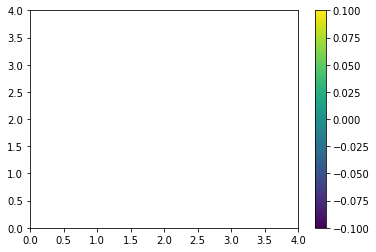

 
SESSION 1
1612712585 1612712671
0 20547 F 1 20493 M 2 62438 F 3 20516 F 4 20488 M 

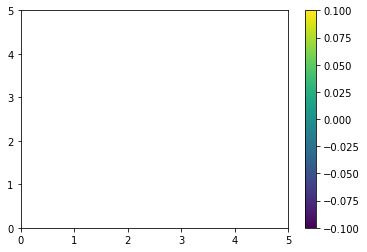

 
1612712671 1612712757
0 20547 F 1 20493 M 2 62438 F 3 20516 F 4 20488 M 

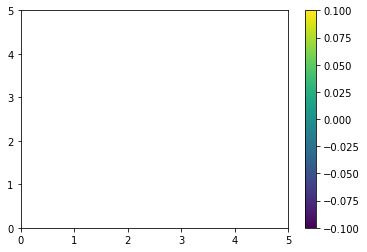

 
1612712757 1612712843
0 20547 F 1 20493 M 2 62438 F 3 20516 F 4 20488 M 

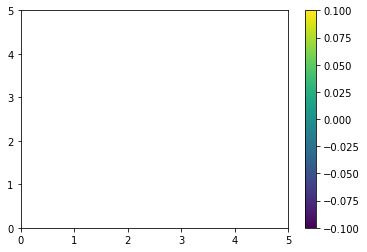

 
SESSION 2
1613386397 1613386483
0 20547 F 1 20493 M 2 20516 F 3 20488 M 

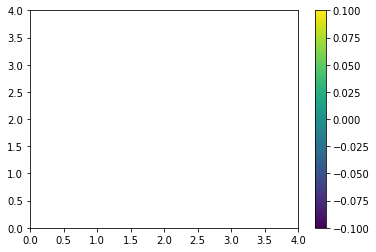

 
1613386483 1613386569
0 20547 F 1 20493 M 2 20516 F 3 20488 M 

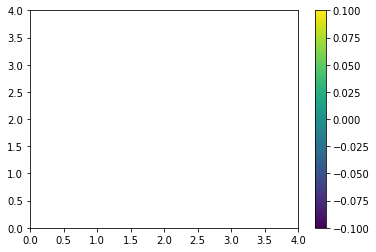

 
1613386569 1613386655
0 20547 F 1 20493 M 2 20516 F 3 20488 M 

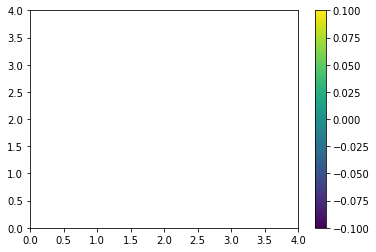

 
SESSION 3
1614113898 1614113984
0 20547 F 1 20528 F 2 20493 M 3 62438 F 4 20516 F 5 20522 M 

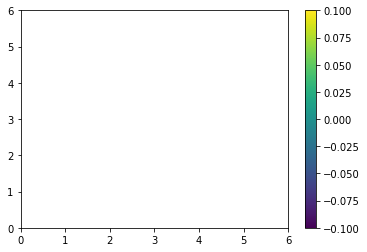

 
1614113984 1614114070
0 20547 F 1 20528 F 2 20493 M 3 62438 F 4 20516 F 5 20522 M 

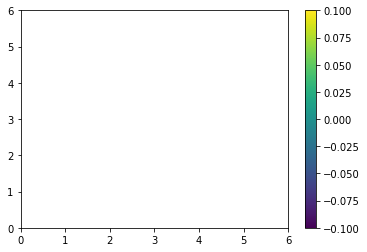

 
1614114070 1614114156
0 20547 F 1 20528 F 2 20493 M 3 62438 F 4 20516 F 5 20522 M 

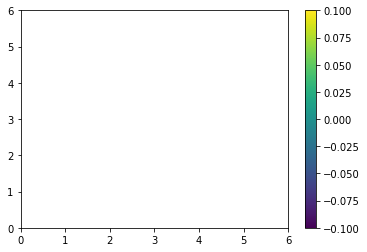

 
1614114156 1614114242
0 20547 F 1 20528 F 2 20493 M 3 62438 F 4 20516 F 5 20522 M 

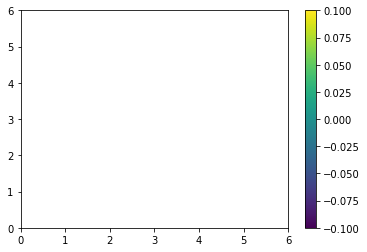

 
SESSION 4
1614700802 1614700888
0 20632 M 1 20616 M 2 20513 F 3 20488 M 4 20529 PUP 5 20595 M 

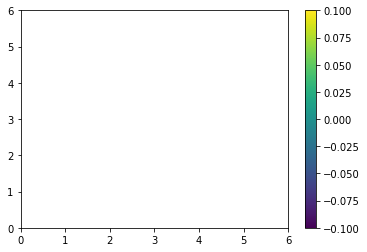

 
1614700888 1614700974
0 20632 M 1 20616 M 2 20513 F 3 20488 M 4 20529 PUP 5 20595 M 

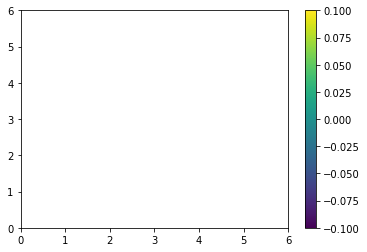

 
1614700974 1614701060
0 20632 M 1 20616 M 2 20513 F 3 20488 M 4 20529 PUP 5 20595 M 

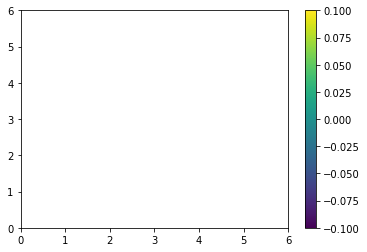

 
1614701060 1614701146
0 20632 M 1 20616 M 2 20513 F 3 20488 M 4 20529 PUP 5 20595 M 

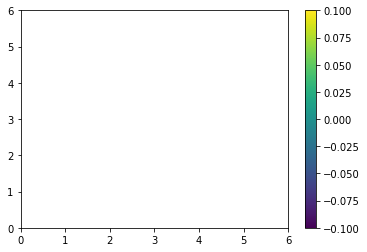

 
1614701146 1614701232
0 20632 M 1 20616 M 2 20513 F 3 20488 M 4 20529 PUP 5 20595 M 

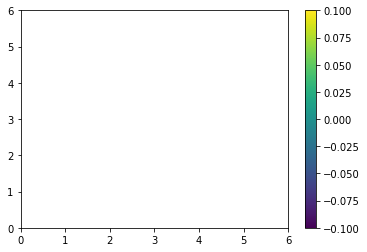

 
SESSION 5
1615479152 1615479238
0 20632 M 1 20547 F 2 20522 M 3 20488 M 4 20453 M 5 20595 M 

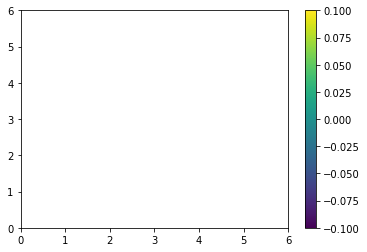

 
1615479238 1615479324
0 20632 M 1 20547 F 2 20522 M 3 20488 M 4 20453 M 5 20595 M 

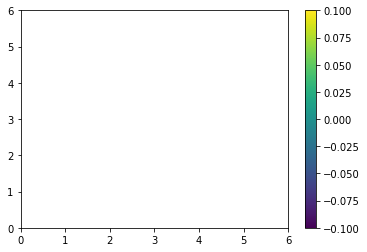

 
1615479324 1615479410
0 20632 M 1 20547 F 2 20522 M 3 20488 M 4 20453 M 5 20595 M 

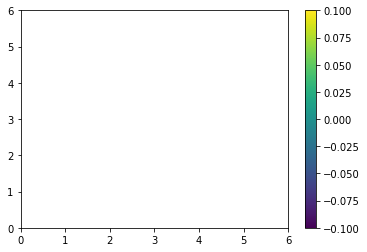

 
1615479410 1615479496
0 20632 M 1 20547 F 2 20522 M 3 20488 M 4 20453 M 5 20595 M 

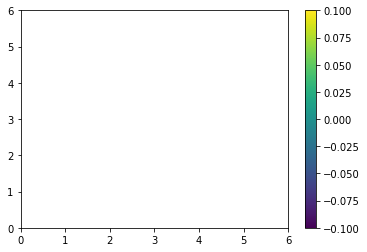

 
1615479496 1615479582
0 20632 M 1 20547 F 2 20522 M 3 20488 M 4 20453 M 5 20595 M 

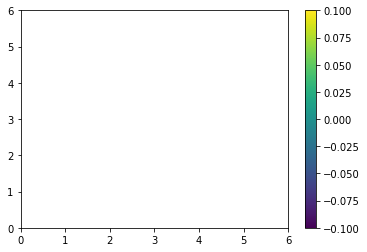

 
SESSION 6
1617112459 1617112545
0 20547 F 1 20493 M 

KeyError: ignored

In [121]:
from networkx.algorithms.community import k_clique_communities
import matplotlib.pyplot as plt
import networkx as nx

time_unite = 86


#main_data = np.zeros((len(list_tag),int((maximum_time-minimum_time)/per_unit), 2))
#all_path_data.append((all_cor_for_pos_list, gm.means_, list_tag, correlations, main_data, minimum_time, maximum_time))
for session in range(7):
  print("SESSION", session)
  minimum_time = int(all_path_data[session][5])
  maximum_time = int(all_path_data[session][6])
  c_time = 0
  while c_time < np.shape(all_path_data[session][4])[1] -time_unite:
    a = np.squeeze(all_path_data[session][4][:, c_time:(c_time + time_unite),: ])
    distance_array = compute_distance_array(a, all_path_data[session][2], minimum_time, minimum_time + time_unite)
    distance_array = distance_array/np.max(distance_array)

    
    minimum_time = minimum_time+ time_unite
    c_time = c_time + time_unite

    INDEX =0 
    for tag in all_path_data[session][2]:
      number = dict_of_info[session][int(tag)]
      print(INDEX,number, dict_of_colony[number][2], end = " ")
      INDEX += 1
    plt.figure()
    plt.pcolormesh(distance_array)
    plt.colorbar()
    plt.show()
    #G= nx.from_numpy_matrix(1/(distance_array+0.1), create_using=nx.DiGraph) 
    #G= nx.from_numpy_matrix(distance_array, create_using=nx.DiGraph) 
    #plt.figure(figsize=(2,2))
    #nx.draw_spectral(G, with_labels= True)
    #plt.axis('equal')
    #layout = nx.spring_layout(G)

    #nx.draw_networkx_labels(G)
    #nx.draw(G, layout, with_labels= True)
    #nx.draw_networkx_edge_labels(G, pos=layout)
    plt.show()

    print(" ")

    


print(dict_of_colony)




#print(nx.non_randomness(G))
#print(nx.flow_hierarchy(G))
#print("step2")
#print(list(k_clique_communities(G, 2, cliques=None)))



  

[[array([array([0.]), array([0.69392143]), array([1.]), array([0.43333739])],
      dtype=object)
  array([0.8257575757575758, 1.0, 0.0, 0.6439393939393939], dtype=object)]
 [array([array([0.]), array([1.]), array([0.95105825]), array([0.61041219])],
      dtype=object)
  array([0.0, 1.0, 0.06767955801104972, 0.30248618784530384], dtype=object)]
 [array([array([0.]), array([1.]), array([0.33996355]), array([0.40238363])],
      dtype=object)
  array([1.0, 0.8082595870206489, 0.0, 0.605457227138643], dtype=object)]
 [array([array([0.4947514]), array([1.]), array([0.73235741]), array([0.]),
       array([0.94817103]), array([0.70397468])], dtype=object)
  array([0.5542168674698795, 0.20933734939759036, 0.25978915662650603,
       0.2914156626506024, 0.0, 1.0], dtype=object)]
 [array([array([1.]), array([0.53538832]), array([0.8960717]), array([0.]),
       array([0.43823555])], dtype=object)
  array([1.0, 0.0, 0.7721202003338898, 0.18697829716193656,
       0.9991652754590985], dtype=obj

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  import sys


ValueError: ignored

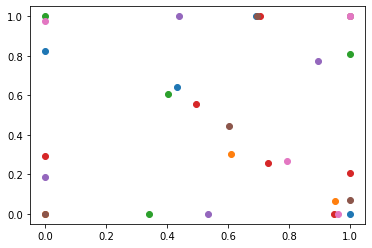

In [ ]:
(posind =0

for p in range(len(data_read_path)):
  plt.scatter(all_path_data[p][0][posind][:,0],all_path_data[p][0][posind][:,1])
  list_empty.append((all_path_data[p][0][posind][:,0],all_path_data[p][0][posind][:,1]))



    #plt.scatter(all_path_data[p][0][0,:,:])
 # print(all_path_data[p][0][posind])
#model = LinearRegression().fit(x, y)
plt.figure()
posind =1
#for p in range(len(data_read_path)):
  #plt.scatter(all_path_data[p][0][posind][:,0],all_path_data[p][0][posind][:,1])
plt.figure()
posind =2
#for p in range(len(data_read_path)):
  #plt.scatter(all_path_data[p][0][posind][:,0],all_path_data[p][0][posind][:,1])

#print(all_path_data[0][0])

In [ ]:
#import matplotlib.pyplot as plt

#fig= plt.figure()

#f = np.array(range(gmmcomp))
#for i, txt in enumerate(f):
   # plt.annotate(txt, (gm.means_[i,0], gm.means_[i,1]))
    
#plt.scatter(gm.means_[:, 0], gm.means_[:, 1])
#plt.show()
#fig.savefig('mapofplaces.png')

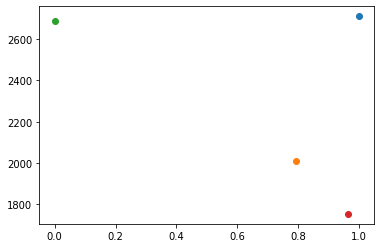

In [ ]:
  fig = plt.figure()

  for a in range(len(list_tag)):
      gmpred = (gm.predict(main_data[a,:,:])   ).astype(int)
      #plt.plot(gmpred )
      plt.scatter(correlations[a] , len(gmpred[gmpred==0]))
      
  fig.savefig('dominanceVsHome0.png')

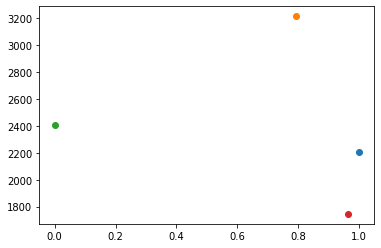

In [ ]:
fig = plt.figure()

for a in range(len(list_tag)):
    gmpred = (gm.predict(main_data[a,:,:])   ).astype(int)
    #plt.plot(gmpred )
    plt.scatter(correlations[a] , len(gmpred[gmpred==1]))
    
fig.savefig('dominanceVsHome1.png')

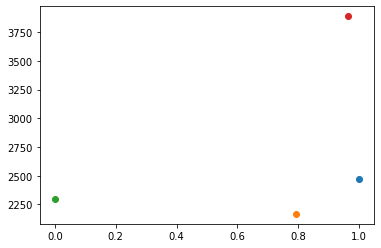

In [ ]:
fig = plt.figure()

for a in range(len(list_tag)):
    gmpred = (gm.predict(main_data[a,:,:])   ).astype(int)
    #plt.plot(gmpred )
    plt.scatter(correlations[a] , len(gmpred[gmpred==2]))
    
fig.savefig('dominanceVsHome2.png')

20493
20493
20493
20493
20632
20632
20493


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:30: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


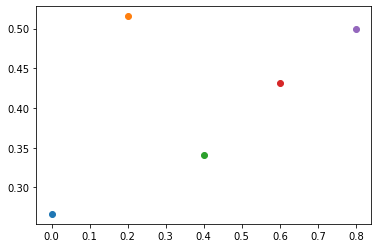

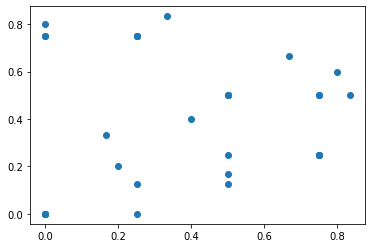

In [ ]:
#dict_of_colony = {RFID: (w,AL)}
#dict_of_info = 
#all_path_data.append((all_cor_for_pos_list, gm.means_, list_tag, correlations))

#צריך לנרמל לפי מספר הפעמים שעטלף השתתף בניסוי


corelation_arm_list = []

for a in range(len(all_path_data)):
  list_tag_tempy = all_path_data[a][2]
  for b in range(len(list_tag_tempy)):
    cor_temp =np.where(np.sort(all_path_data[a][3]) == all_path_data[a][3][b])[0] / len(list_tag_tempy)
 
    tmpallweight = []
    for t1 in range(len(list_tag_tempy)):
        tmpallweight.append( dict_of_colony[  dict_of_info[a][   list_tag_tempy[t1]   ]    ][1])
    
    all_weight =np.sort(np.array(tmpallweight))
    my_weight =  dict_of_colony[  dict_of_info[a][   list_tag_tempy[b]   ]    ][1]
    if(my_weight< 80 or my_weight == -1):
      continue
  #  print(all_weight)
    weight_temp = np.mean(np.where(all_weight ==my_weight)) / len(list_tag_tempy)
    if(weight_temp > 0.7):
       print( dict_of_info[a][   list_tag_tempy[b]   ])
   # print(weight_temp)
    corelation_arm_list.append((cor_temp, weight_temp))
    #corelation_arm_list.append((cor_temp[0], dict_of_colony[  dict_of_info[a][   list_tag_tempy[b]   ]    ][0]))
corelation_arm_list = np.array(corelation_arm_list)

#plt.figure()
for i in range (5):

  plt.scatter(i*0.2, np.mean(corelation_arm_list[(corelation_arm_list[:,0] > (i*0.2))&(corelation_arm_list[:,0] <= ((i+1)*0.2)),1]))
plt.savefig('dominanceVsWeight.png')

plt.figure()
plt.scatter(corelation_arm_list[:,0], corelation_arm_list[:,1])
#print(np.corrcoef(corelation_arm_list[:,0], corelation_arm_list[:,1]))






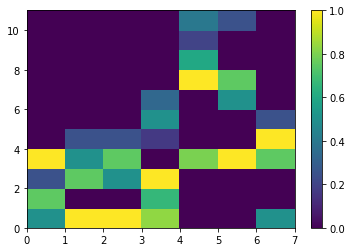

<Figure size 432x288 with 0 Axes>

In [ ]:


def creat_dominmap(all_path_data, make_random = False):
  rfid_list = {}
  for a in range(len(all_path_data)):

    list_tag_tempy = np.array(all_path_data[a][2])
    
    for b in range(len(list_tag_tempy)):
        my_rfid = (dict_of_info[a][int(list_tag_tempy[b])])

        if my_rfid not in rfid_list.keys():
          rfid_list[my_rfid] = np.zeros(len(all_path_data))
        

        rfid_list[my_rfid][a] = all_path_data[a][3][b] +1

  temp_list =[]
  index_of_rfids = []

  for rfid in rfid_list:
    temp_list.append(rfid_list[rfid])
    index_of_rfids.append(rfid)

  session_bats_dominnace_array  = np.array(temp_list)
  for i in range(np.shape(session_bats_dominnace_array)[1]):
    tempo = (session_bats_dominnace_array[:, i] == 0)
    session_bats_dominnace_array[~tempo, i] = (len(tempo[~tempo]) - ( np.argsort(-session_bats_dominnace_array[~tempo, i])))/len(tempo[~tempo])

  if make_random:
    for a in range(len(all_path_data)):
      temp = session_bats_dominnace_array[:,a]
      placesnotzero = (temp != 0)
      tt = temp[placesnotzero]
      np.random.shuffle(tt)
      session_bats_dominnace_array[placesnotzero,a] = tt
  return session_bats_dominnace_array


session_bats_dominnace_array = creat_dominmap(all_path_data)

plt.pcolormesh(session_bats_dominnace_array)
plt.colorbar()
plt.show()

plt.savefig('DomiMap.png')
#fig.savefig('DomiMap.png')

In [ ]:
#session_bats_dominnace_array



def run_KNN(session_bats_dominnace_array):
  x_train = []
  y_train = []
  for i in range(np.shape(session_bats_dominnace_array)[1]):
    for bat in range(np.shape(session_bats_dominnace_array)[0]):
      temp_array = session_bats_dominnace_array[:,i]
      sortedarr = np.sort(-temp_array)

      ind = np.argwhere(sortedarr == -temp_array[bat])[0]
      y_train.append(ind)
      temp_array= np.delete(temp_array,bat, 0)
      x_train.append(1*(temp_array > 0))

  stamarray = np.array(range(len(x_train))).astype(int)

  np.random.shuffle(stamarray)
  x_train = np.array(x_train)
  y_train = np.array(y_train)
  x_train = x_train[stamarray]
  y_train = y_train[stamarray]

  splitind = 60
  classifier = KNeighborsClassifier(n_neighbors=3)
  classifier.fit(x_train[0:splitind], y_train[0:splitind])

  y_pred = classifier.predict(x_train[splitind:])

  y_train = y_train.T[0]

  #plt.plot(y_train[splitind:] , "k" )
  #plt.plot(y_pred)
  #plt.show()

  #eror = ((y_train[splitind:]**2) - (y_pred**2))**0.5
  eror = (y_train[splitind:] - y_pred)**2
  
  #plt.plot(eror, "r")
  #print(f"Mean: {np.mean(eror)} Std: {np.std(eror)}")

  return np.mean(eror), np.std(eror)

  #print(confusion_matrix(y_train[splitind:], y_pred))
  #print(classification_report(y_train[splitind:], y_pred))


#real_mean, real_std = run_KNN(session_bats_dominnace_array)

mean_std_list_real = []
mean_std_list = []

for num in range(1000):
  real_mean, real_std = run_KNN((session_bats_dominnace_array))
  mean_std_list_real.append((real_mean, real_std))




#for num in range(1000):
  #for i in range(np.shape(session_bats_dominnace_array)[1]):  
   # temp = session_bats_dominnace_array[i,:] 
    #np.random.shuffle(temp)
   # session_bats_dominnace_array[i,:] =temp
  #mean, std = run_KNN((session_bats_dominnace_array))
 # mean_std_list.append((mean, std))


mean_std_list_real = np.array(mean_std_list_real)
mean_std_list = np.array(mean_std_list)
plt.plot(mean_std_list[:,0], "k")
plt.plot(mean_std_list[:,1])
plt.show()
print(f"REAL: Mean: {np.mean(mean_std_list_real[:,0])} Std: {np.mean(mean_std_list_real[:,1])}")
print(f"LOOP: Mean: {np.mean(mean_std_list[:,0])} Std: {np.mean(mean_std_list[:,1])}")






/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:28: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:28: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:28: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:28: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:28: DataConversionWarning: A column-vector y was passed

IndexError: ignored

In [ ]:

#session_bats_dominnace_array
#print(session_bats_dominnace_array)
def getstatus_with_without(session_bats_dominnace_array):
  bats_status = np.zeros((np.shape(session_bats_dominnace_array)[0], np.shape(session_bats_dominnace_array)[0]))
  bats_status_with = np.zeros((np.shape(session_bats_dominnace_array)[0], np.shape(session_bats_dominnace_array)[0]))
  bats_status_without = np.zeros((np.shape(session_bats_dominnace_array)[0], np.shape(session_bats_dominnace_array)[0]))
  session_bats_dominnace_array[session_bats_dominnace_array == 0] = 'nan'

  for bat in range(np.shape(session_bats_dominnace_array)[0]):
    for other_bat in range(np.shape(session_bats_dominnace_array)[0]):
      if bat == other_bat:
        continue
        
      other_bat_presence = session_bats_dominnace_array[other_bat,:]
      score_with = np.nanmean(session_bats_dominnace_array[bat, ~np.isnan(other_bat_presence)]) #*np.nansum(~np.isnan(other_bat_presence))
      score_without = np.nanmean(session_bats_dominnace_array[bat, np.isnan(other_bat_presence)]) #*np.nansum(np.isnan(other_bat_presence))
      bats_status[bat, other_bat] = score_with/score_without # /np.nansum(np.isnan(session_bats_dominnace_array[bat,:])))
      bats_status_with[bat, other_bat] = score_with #/np.nansum(np.isnan(session_bats_dominnace_array[bat,:]))
      bats_status_without[bat, other_bat]  = score_without #/np.nansum(np.isnan(session_bats_dominnace_array[bat,:]))

  return bats_status


#plt.pcolormesh(session_bats_dominnace_array)
#plt.colorbar()

#plt.figure()
#plt.pcolormesh(bats_status)
#plt.colorbar()

#plt.figure()
#plt.pcolormesh(bats_status_with)
#plt.colorbar()
#plt.figure()
#plt.pcolormesh(bats_status_without)
#plt.colorbar()



import matplotlib.pyplot as plt
import networkx as nx

# The actual work
# You may prefer `nx.from_numpy_matrix`.
#G2 = nx.from_scipy_sparse_matrix(nx.from_numpy_matrix(bats_status))

G= nx.from_numpy_matrix(bats_status, create_using=nx.DiGraph)
plt.figure(figsize=(20,10))
#nx.draw_spectral(G)
#nx.draw_networkx_labels(G)
plt.axis('equal')

layout = nx.spring_layout(G)
nx.draw(G, layout, with_labels= True)
#nx.draw_networkx_edge_labels(G, pos=layout)
plt.show()


from networkx.algorithms.community import k_clique_communities

#print(nx.non_randomness(G))
#print(nx.flow_hierarchy(G))
#print("step2")
#print(list(k_clique_communities(G, 2, cliques=None)))


G= nx.from_numpy_matrix(bats_status_with, create_using=nx.DiGraph)
plt.figure(figsize=(20,10))
#nx.draw_spectral(G)
#nx.draw_networkx_labels(G)
plt.axis('equal')

layout = nx.spring_layout(G)
nx.draw(G, layout, with_labels= True)
#nx.draw_networkx_edge_labels(G, pos=layout)
plt.show()


from networkx.algorithms.community import k_clique_communities

#print(nx.non_randomness(G))
#print(nx.flow_hierarchy(G))
#print("step2")
#print(list(k_clique_communities(G, 2, cliques=None)))

NameError: ignored

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: RuntimeWarning: Mean of empty slice
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: RuntimeWarning: Mean of empty slice


(121,)


/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)


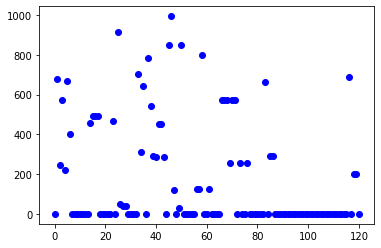

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in true_divide


(array([0]), array([46]))


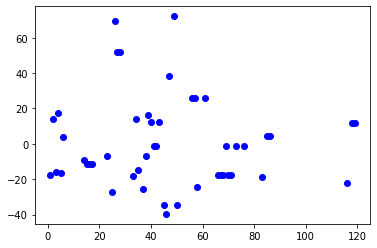

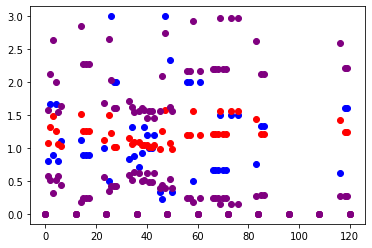

In [ ]:

session_bats_dominnace_array = creat_dominmap(all_path_data, False)
bats_status_orig = np.matrix.flatten(getstatus_with_without(session_bats_dominnace_array))

n = 1000
allbatsstatus = []
for i in range(n):
  session_bats_dominnace_array = creat_dominmap(all_path_data, True)
  allbatsstatus.append(np.matrix.flatten(getstatus_with_without(session_bats_dominnace_array)))

allbatsstatus = np.array(allbatsstatus)
my_range = np.shape(bats_status_orig)[0]
advancelist = []
for i in range(my_range):
  advancelist.append(len(allbatsstatus[(allbatsstatus[:,i] >bats_status_orig[i])]))

bats_status_mean = np.nanmean(allbatsstatus , axis = 0)
bats_status_std = np.nanstd(allbatsstatus , axis = 0)
print(np.shape(bats_status_mean))

plt.figure()
plt.scatter(np.array(range(my_range)) , advancelist, color='blue')
plt.show()
advancelist = np.array(advancelist)
print(np.where([advancelist > 990]))

plt.figure()
plt.scatter(np.array(range(my_range)) , (bats_status_orig - bats_status_mean)/(bats_status_std/(n**0.5) ), color='blue')
plt.show()

plt.figure()
plt.scatter(np.array(range(my_range)) , bats_status_orig , color='blue')
plt.scatter(np.array(range(my_range)) , bats_status_mean , color='red')
plt.scatter(np.array(range(my_range)) , bats_status_mean + bats_status_std , color='purple')
plt.scatter(np.array(range(my_range)) , bats_status_mean - bats_status_std , color='purple')
plt.show()

In [ ]:
print(food_visit_aray)
sessionid = 0
listofresults = []
for sessionvisitarray in food_visit_aray:
  batdid = 0 
  for batrfid in index_of_rfids:
    if( sessionvisitarray[batrfid] > 0  ):
      visitstoofood = sessionvisitarray[batrfid]
      domofbat = session_bats_dominnace_array[batdid , sessionid ]
    listofresults.append((visitstoofood , domofbat , sessionid))
    batdid+=1

  sessionid += 1
listofresults = np.array(listofresults)

sessionid = 0
for sessionvisitarray in food_visit_aray:
  sessionidxs =  (listofresults[ :,2 ] == sessionid)
  plt.figure()
  plt.scatter(   listofresults[sessionidxs,1] - 1 , listofresults[sessionidxs,0])
  sessionid += 1

[{20595: 0, 20632: 0, 20522: 0, 20516: 14292, 20493: 12276, 20616: 0, 20513: 0, 20488: 3117, 20528: 22923, 20547: 0, 62438: 0, 20592: 0, 20529: 0, 20453: 0}, {20595: 0, 20632: 0, 20522: 0, 20516: 3872, 20493: 2682, 20616: 0, 20513: 0, 20488: 2176, 20528: 0, 20547: 36264, 62438: 1286, 20592: 0, 20529: 0, 20453: 0}, {20595: 0, 20632: 0, 20522: 0, 20516: 2106, 20493: 8862, 20616: 0, 20513: 0, 20488: 2978, 20528: 0, 20547: 11982, 62438: 0, 20592: 0, 20529: 0, 20453: 0}, {20595: 0, 20632: 0, 20522: 49069, 20516: 32580, 20493: 28688, 20616: 0, 20513: 0, 20488: 0, 20528: 40048, 20547: 47497, 62438: 43453, 20592: 0, 20529: 0, 20453: 0}, {20595: 65131, 20632: 65944, 20522: 0, 20516: 0, 20493: 0, 20616: 24592, 20513: 19570, 20488: 52776, 20528: 0, 20547: 0, 62438: 0, 20592: 0, 20529: 26670, 20453: 0}, {20595: 37731, 20632: 37623, 20522: 34178, 20516: 0, 20493: 0, 20616: 0, 20513: 0, 20488: 22100, 20528: 0, 20547: 14528, 62438: 0, 20592: 0, 20529: 0, 20453: 764}, {20595: 0, 20632: 0, 20522: 0, 20

NameError: ignored